In [1]:
import pickle

import numpy as np
from scipy.stats import qmc
from scipy.special import eval_legendre

import rose

from benchmark import BenchmarkData

In [2]:
sampler = qmc.LatinHypercube(2)
n_samples = 50
sample = sampler.random(n_samples)

In [3]:
lower_bounds = [100, -200]
upper_bounds = [300, 0]

parameter_samples = qmc.scale(sample, lower_bounds, upper_bounds)

In [4]:
se = rose.SchroedingerEquation(rose.MN_Potential)

In [7]:
energy = 50 # MeV
k = np.sqrt(2*rose.MN_Potential.mu*energy/rose.constants.HBARC)
spread = 1
n = 10000
s_mesh = np.linspace(k*1e-12, k*50, n)

se.solve_se2(50, parameter_samples[0], s_mesh, 0)

array([[ 1.09840906e-12,  0.00000000e+00],
       [ 5.49259454e-03,  5.49279530e-03],
       [ 1.09851891e-02,  1.09851499e-02],
       ...,
       [ 5.49094676e+01, -1.01512801e+00],
       [ 5.49149602e+01, -1.01156356e+00],
       [ 5.49204528e+01, -1.00795049e+00]])

In [9]:
energy = 50 # MeV
k = np.sqrt(2*rose.MN_Potential.mu*energy/rose.constants.HBARC)
spread = 1
n = 10000
r0s = np.linspace(10.0, 20.0, 11)

while spread > 1e-9:
    s_mesh = np.linspace(k*1e-6, k*50, n)
    s_wave_phase_shifts = np.array(
        [[se.delta(energy, theta, s_mesh, 0, s_0=k*r0, dx=1e-12) for r0 in r0s] for theta in parameter_samples]
    )
    sigma = np.std(s_wave_phase_shifts, axis=1)
    mu = np.median(s_wave_phase_shifts, axis=1)
    spread = np.abs(np.max(sigma/mu))
    print(n, sigma.shape, mu.shape, spread)
    n += 1000

10000 (50,) (50,) 9.880962905052369e-09
11000 (50,) (50,) 7.097660207505919e-09
12000 (50,) (50,) 5.433250652373363e-09
13000 (50,) (50,) 5.081365456837827e-09
14000 (50,) (50,) 3.694870217930905e-09
15000 (50,) (50,) 2.9684111523058893e-09
16000 (50,) (50,) 2.88880817768755e-09
17000 (50,) (50,) 2.182376350339209e-09
18000 (50,) (50,) 2.041776089470123e-09
19000 (50,) (50,) 1.3560195812457158e-09
20000 (50,) (50,) 1.586717279875181e-09
21000 (50,) (50,) 1.907261153185703e-09
22000 (50,) (50,) 6.841714738026592e-10


In [15]:
energy = 50 # MeV
k = np.sqrt(2*rose.MN_Potential.mu*energy/rose.constants.HBARC)
spread = 1
n = 10000
r0s = np.linspace(10.0, 20.0, 11)

while spread > 1e-9:
    s_mesh = np.linspace(k*1e-6, k*30, n)
    phase_shifts = np.array(
        [[se.delta(energy, theta, s_mesh, 2, s_0=k*r0, dx=1e-12) for r0 in r0s] for theta in parameter_samples]
    )
    sigma = np.std(phase_shifts, axis=1)
    mu = np.median(phase_shifts, axis=1)
    spread = np.abs(np.max(sigma/mu))
    print(n, sigma.shape, mu.shape, spread)
    n += 1000

10000 (50,) (50,) 1.2633688859367854e-08
11000 (50,) (50,) 6.430827473065741e-09
12000 (50,) (50,) 1.070520063401034e-08
13000 (50,) (50,) 6.179314212625292e-09
14000 (50,) (50,) 6.115016017398251e-09


KeyboardInterrupt: 

In [13]:
# filename = f'../src/rose/datfiles/benchmark_data_MN_Potential_E_{energy:.2f}_MeV.pkl'
# with open(filename, 'wb') as f:
#     pickle.dump(benchmark_data, f, pickle.HIGHEST_PROTOCOL)

In [14]:
with open(filename, 'rb') as f:
    bd = pickle.load(f)

In [15]:
import matplotlib.pyplot as plt

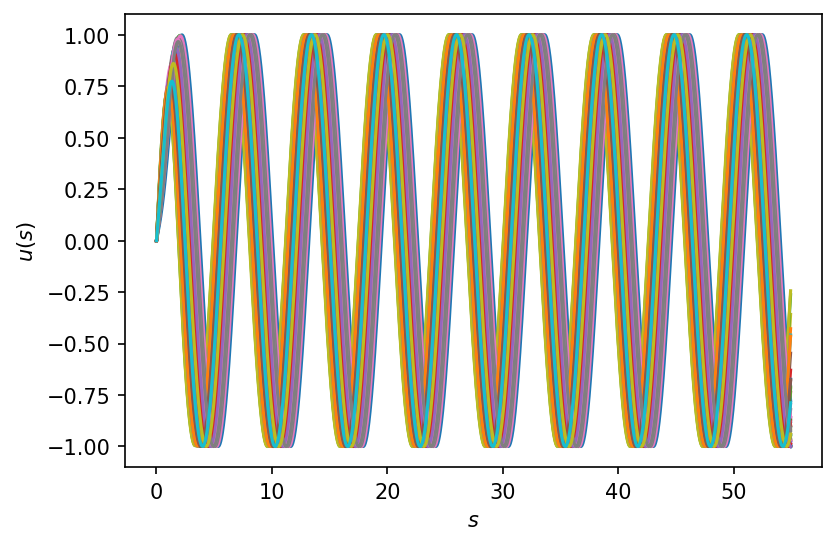

In [16]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

for d in bd:
    ax.plot(d.s, d.u)

ax.set_xlabel(r'$s$')
ax.set_ylabel(r'$u(s)$');

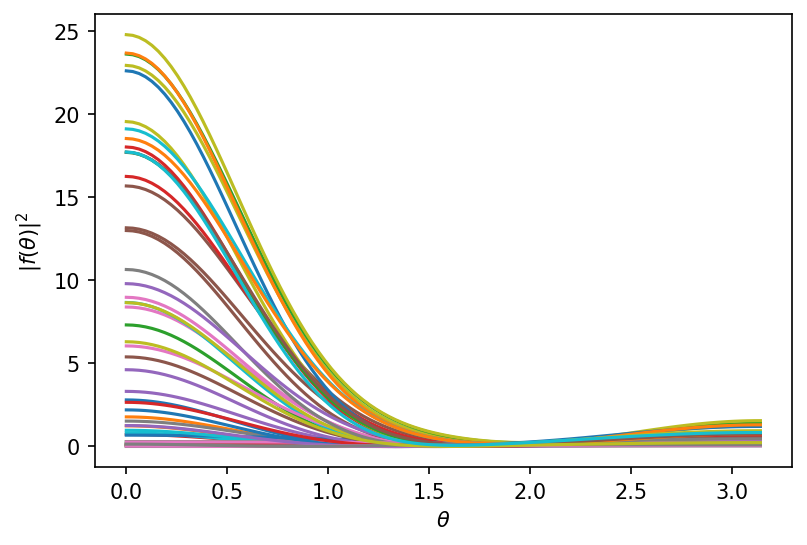

In [17]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

for d in bd:
    f = d.scattering_amplitude
    ax.plot(np.arccos(d.costheta), np.real(f*np.conj(f)))

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$|f(\theta)|^2$');